<a href="https://colab.research.google.com/github/grigorievaekaterina/BI_Project_5/blob/main/Lab_Notebook_H%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

We are going to work with “FixMyProfessor.com” (Mike Rayko's data)

In [10]:
!wget 'https://github.com/grigorievaekaterina/BI_Project_5/blob/main/data/SNP_raw_v4_Full_20170514175358.txt.zip?raw=true'

--2023-02-16 19:32:01--  https://github.com/grigorievaekaterina/BI_Project_5/blob/main/data/SNP_raw_v4_Full_20170514175358.txt.zip?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/grigorievaekaterina/BI_Project_5/raw/main/data/SNP_raw_v4_Full_20170514175358.txt.zip [following]
--2023-02-16 19:32:01--  https://github.com/grigorievaekaterina/BI_Project_5/raw/main/data/SNP_raw_v4_Full_20170514175358.txt.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/grigorievaekaterina/BI_Project_5/main/data/SNP_raw_v4_Full_20170514175358.txt.zip [following]
--2023-02-16 19:32:02--  https://raw.githubusercontent.com/grigorievaekaterina/BI_Project_5/main/data/SNP_raw_v4_Full_20170514175358.txt.zip
Resolving raw.githubusercontent.com (raw.githubuserco

In [11]:
! unzip -p /content/SNP_raw_v4_Full_20170514175358.txt.zip?raw=true > 23andMe.txt

# File conversion 

First of all, let us download the tool. We will use plink, a program widely used in population genetics.

In [12]:
!wget "https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20230116.zip"

--2023-02-16 19:32:32--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20230116.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.37.240, 52.217.233.168, 52.217.92.30, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.37.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8953489 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20230116.zip.1’

plink_linux_x86_64_ 100%[===================>]   8.54M  13.7MB/s    in 0.6s    

2023-02-16 19:32:33 (13.7 MB/s) - ‘plink_linux_x86_64_20230116.zip.1’ saved [8953489/8953489]



In [13]:
!unzip "/content/plink_linux_x86_64_20230116.zip"

Archive:  /content/plink_linux_x86_64_20230116.zip
replace plink? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: plink                   
replace LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LICENSE                 
replace toy.ped? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: toy.ped                 
replace toy.map? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: toy.map                 
replace prettify? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: prettify                


In [14]:
!/content/plink --version

PLINK v1.90b7 64-bit (16 Jan 2023)


Let us remove all SNPs corresponding to deletions and insertions to make the file compatible with annotation tools.


In [15]:
!/content/plink --23file "/content/23andMe.txt" --recode vcf --out snps_clean --output-chr MT --snps-only just-acgt

PLINK v1.90b7 64-bit (16 Jan 2023)             www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snps_clean.log.
Options in effect:
  --23file /content/23andMe.txt
  --out snps_clean
  --output-chr MT
  --recode vcf
  --snps-only just-acgt

12985 MB RAM detected; reserving 6492 MB for main workspace.
--23file: snps_clean-temporary.bed + snps_clean-temporary.bim +
snps_clean-temporary.fam written.
15125 variants with indel calls present.  '--snps-only no-DI' or
--list-23-indels may be useful here.
Inferred sex: male.
595401 out of 610526 variants loaded from .bim file.
1 person (1 male, 0 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1 founder and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28

The resulting file contains all the analyzed SNPs, and we are interested only in variable positions.


# Origins, haplogroups

Then we need to establish probable ethnicity of given subject by identifying maternal (mtDNA) and paternal (Y chromosome) haplogroups. 

For mtDNA haplogroup we used https://dna.jameslick.com/mthap/

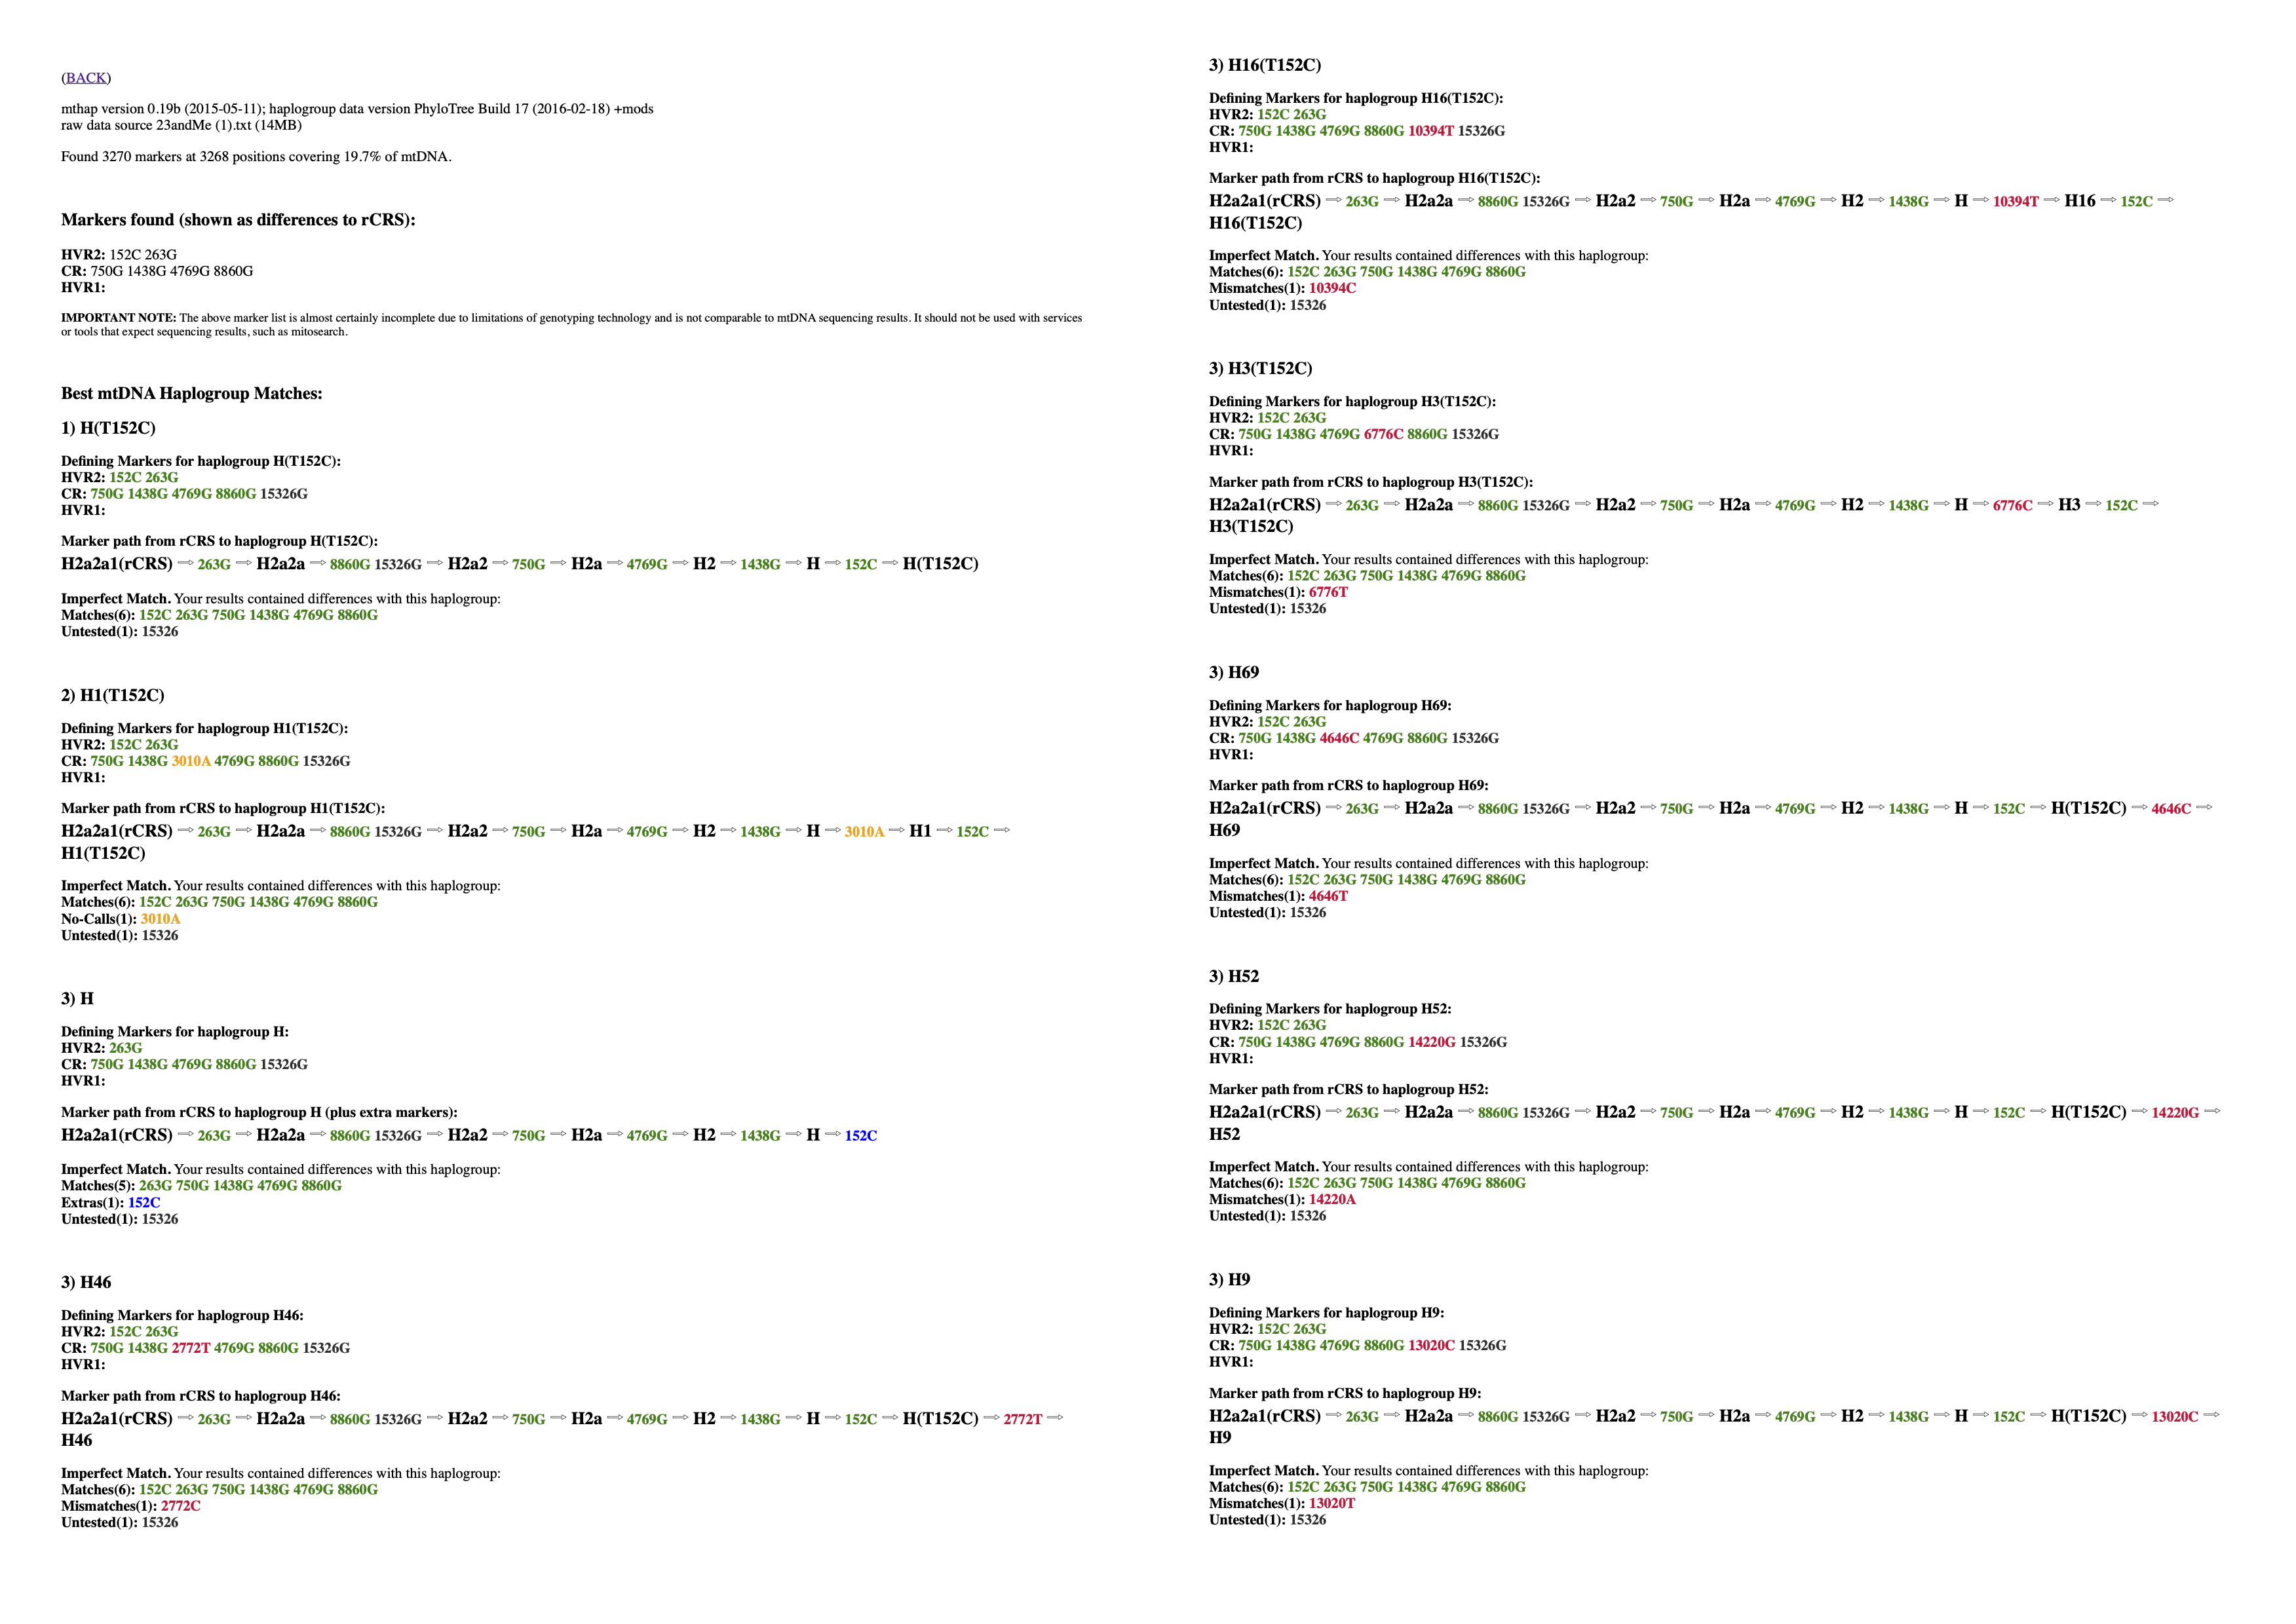

The results gave us the next ones
*   H1
*   H
*   H46
*   H16
*   H3
*   H69
*   H52
*   H9




For Y-chromosome haplogroup we used https://ytree.morleydna.com/extractFromAutosomal

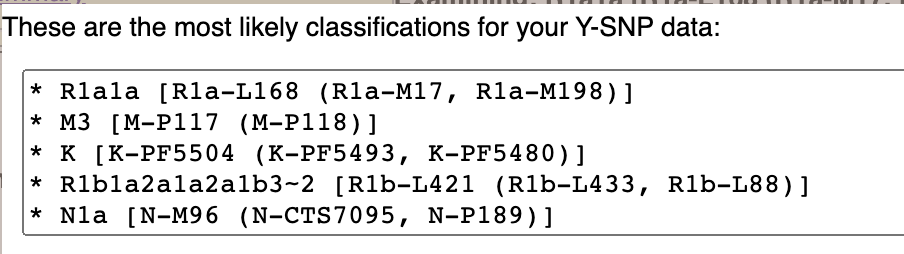

The results were:
* R1a1a [R1a-L168 (R1a-M17, R1a-M198)]
* M3 [M-P117 (M-P118)]
* K [K-PF5504 (K-PF5493, K-PF5480)]
* R1b1a2a1a2a1b3~2 [R1b-L421 (R1b-L433, R1b-L88)]
* N1a [N-M96 (N-CTS7095, N-P189)]

# Annotation

We are going to use VEP (Variant Effect Predictor)

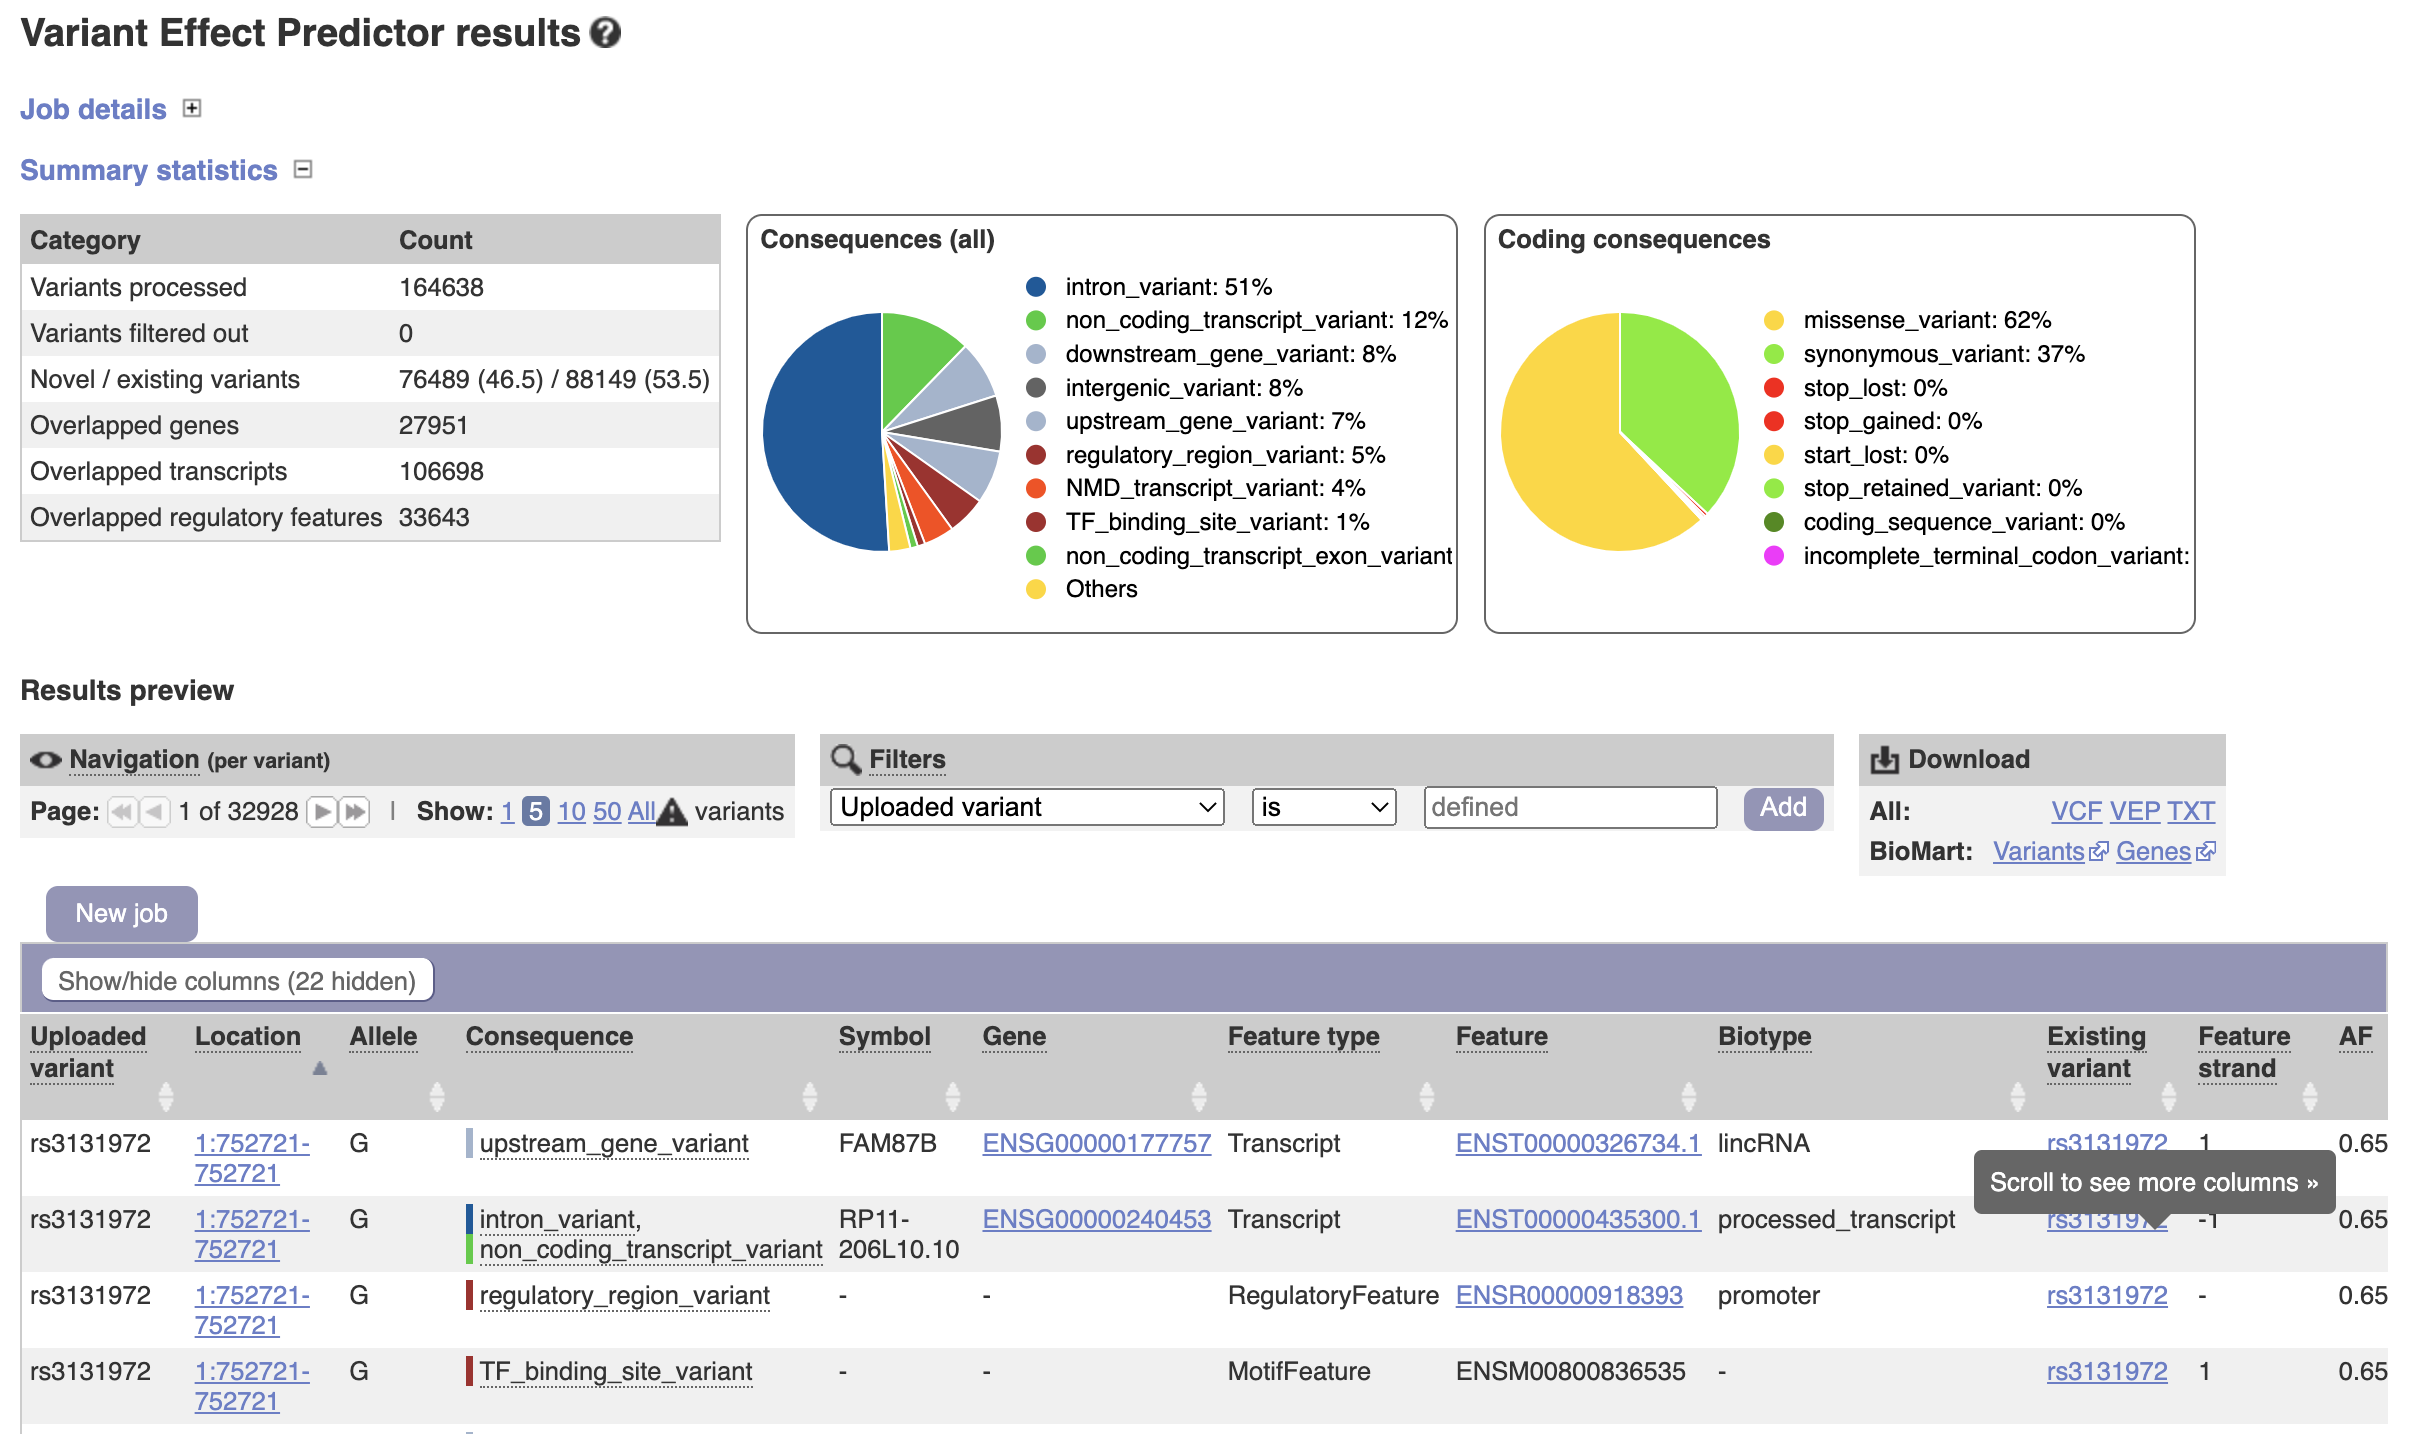

Etc. Let us look at some details

In [1]:
!wget "http://grch37.ensembl.org/Homo_sapiens/Download/Tools/VEP?format=txt;tl=gHGz3rbjMYcajcwi-8958120"

--2023-02-17 16:07:44--  http://grch37.ensembl.org/Homo_sapiens/Download/Tools/VEP?format=txt;tl=gHGz3rbjMYcajcwi-8958120
Resolving grch37.ensembl.org (grch37.ensembl.org)... 193.62.193.83
Connecting to grch37.ensembl.org (grch37.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘VEP?format=txt;tl=gHGz3rbjMYcajcwi-8958120’

VEP?format=txt;tl=g     [            <=>     ] 127.53M  2.81MB/s    in 44s     

2023-02-17 16:08:29 (2.88 MB/s) - ‘VEP?format=txt;tl=gHGz3rbjMYcajcwi-8958120’ saved [133726077]



In [2]:
import pandas as pd
res = pd.read_csv('/content/VEP?format=txt;tl=gHGz3rbjMYcajcwi-8958120', sep = '\t')
res

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
0,rs3131972,1:752721-752721,G,upstream_gene_variant,MODIFIER,FAM87B,ENSG00000177757,Transcript,ENST00000326734.1,lincRNA,...,0.6534,-,-,-,-,-,-,-,-,-
1,rs3131972,1:752721-752721,G,"intron_variant,non_coding_transcript_variant",MODIFIER,RP11-206L10.10,ENSG00000240453,Transcript,ENST00000435300.1,processed_transcript,...,0.6534,-,-,-,-,-,-,-,-,-
2,rs3131972,1:752721-752721,G,regulatory_region_variant,MODIFIER,-,-,RegulatoryFeature,ENSR00000918393,promoter,...,0.6534,-,-,-,-,-,-,-,-,-
3,rs3131972,1:752721-752721,G,TF_binding_site_variant,MODIFIER,-,-,MotifFeature,ENSM00800836535,-,...,0.6534,-,-,-,-,ENSPFM0577,8,N,0.006,TEAD4::SOX6
4,rs11240777,1:798959-798959,G,downstream_gene_variant,MODIFIER,FAM41C,ENSG00000230368,Transcript,ENST00000427857.1,lincRNA,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623198,rs2037999,X:155233098-155233098,T,upstream_gene_variant,MODIFIER,AJ271736.10,ENSG00000270726,Transcript,ENST00000483543.2,retained_intron,...,-,-,1,1,-,-,-,-,-,-
623199,rs2037999,X:155233098-155233098,T,downstream_gene_variant,MODIFIER,IL9R,ENSG00000124334,Transcript,ENST00000489233.1,processed_transcript,...,-,-,1,1,-,-,-,-,-,-
623200,rs2037999,X:155233098-155233098,T,upstream_gene_variant,MODIFIER,IL9R,ENSG00000124334,Transcript,ENST00000494962.1,processed_transcript,...,-,-,1,1,-,-,-,-,-,-
623201,rs2037999,X:155233098-155233098,T,"splice_polypyrimidine_tract_variant,intron_var...",LOW,IL9R,ENSG00000124334,Transcript,ENST00000540897.1,protein_coding,...,-,-,1,1,-,-,-,-,-,-


There are a lot of interesting columns in this table, let s look at CLIN_SIG

In [4]:
!mv "/content/VEP?format=txt;tl=gHGz3rbjMYcajcwi-8958120" "vep_res"

In [5]:
!awk '($32!="-") ' "/content/vep_res" | grep risk_factor | cut -f 1-3 | sort | uniq 

i3000469	2:138759649-138759649	T
i6007787	2:234183368-234183368	G
i6058143	1:161479745-161479745	G
i6059141	8:133909974-133909974	G
rs1024611	17:32579788-32579788	G
rs1049296	3:133494354-133494354	T
rs10757274	9:22096055-22096055	G
rs1169288	12:121416650-121416650	C
rs12150220	17:5485367-5485367	T
rs13266634	8:118184783-118184783	T
rs1801197	7:93055753-93055753	G
rs1801274	1:161479745-161479745	G
rs1801275	16:27374400-27374400	G
rs1801394	5:7870973-7870973	G
rs1801968	9:132580901-132580901	G
rs2004640	7:128578301-128578301	T
rs2073658	1:161010762-161010762	T
rs2184026	9:101304348-101304348	T
rs2239704	6:31540141-31540141	C
rs2241880	2:234183368-234183368	G
rs2281845	1:201081943-201081943	T
rs231775	2:204732714-204732714	G
rs4402960	3:185511687-185511687	T
rs4880	6:160113872-160113872	G
rs4961	4:2906707-2906707	T
rs4977574	9:22098574-22098574	G
rs5174	1:53712727-53712727	T
rs5186	3:148459988-148459988	C
rs61747071	16:53720436-53720436	T
rs6265	11:27679916-27679916	T
rs6280	3:113890815-1

That looks better :) 

In [6]:
!awk '($32!="-") ' "/content/vep_res" | grep risk_factor | cut -f 1-3 | sort | uniq > final.txt

In [10]:
final = pd.read_csv('final.txt', sep = '\t',  names = ['ID', 'Location', 'Allele']).reset_index(drop = True)
final

,ID,Location,Allele
0,i3000469,2:138759649-138759649,T
1,i6007787,2:234183368-234183368,G
2,i6058143,1:161479745-161479745,G
3,i6059141,8:133909974-133909974,G
4,rs1024611,17:32579788-32579788,G
5,rs1049296,3:133494354-133494354,T
6,rs10757274,9:22096055-22096055,G
7,rs1169288,12:121416650-121416650,C
8,rs12150220,17:5485367-5485367,T
9,rs13266634,8:118184783-118184783,T


Next we found diseases linked to SNPs using SNPedia. Here what we got (from our github)

In [ ]:
!wget ""